In [1]:
from assets.specs import startupOption, pdfshowOption
from assets.pdfshow import pdfGet
from assets.startup import initialize
pdfshowOption['mini'] = False
startupOption['debug'] = True
initialize()

<IPython.core.display.Javascript object>

$\newcommand{\mbb}[1]{\mathbb{#1}}
\newcommand{\mrm}[1]{\mathrm{#1}}
\newcommand{\mcal}[1]{\mathcal{#1}}
\newcommand{\tup}[1]{\textup{#1}}
\newcommand{\idty}{\mathds{1}}
%Specials
\newcommand{\hodgedual}{\operatorname{\star}}
\newcommand{\dual}{\ \xlongleftrightarrow{\ \textrm{dual}\ }\ }\newcommand{\abs}[1]{\left|#1\right|}
\newcommand{\norm}[1]{\left\|#1\right\|}
\newcommand{\pqty}[1]{\left(#1\right)}
\renewcommand{\idty}{\mathbf{1}}
\newcommand{\dd}[1]{\operatorname{d} #1}
\newcommand{\dv}[2]{\frac{\dd{#1}}{\dd{#2}}}
\newcommand{\pdv}[2]{\frac{\partial{#1}}{\partial{#2}}}
$`< Utilities initialized >`
```python
matplotlib_notebook, display_whitespace, clear_output, InlinePager, show_docstring, get_methods, goodbye```

### README
> 姓名：Bryan &nbsp;&nbsp; 学号：1500066666
>
> ** 请首先阅读该目录下的 `README.md` 文档！** <br/>
> ** 完整运行本文档需要大概半分多钟！ **
>
> 助教老师好～ 本人不用 `\usepackage` 无法生存 <img class="inline_img" src="https://bryango.github.io/assets/coolemoji/d_erha.png" width="24px" />, 但又难以拒绝 jupyter 的交互式环境，于是捣鼓出了一个解决方案：先用 (Xe) $\mathrm{\LaTeX}$ 编译成 PDF, 再用 [PDF.js](https://github.com/mozilla/pdf.js/) 嵌入到此文档当中。**若想运行文档中的代码，务必先 `restart & run all` 一下**。相应的实现过程与格式优化置于 `assets/` 目录内，不属于作业的核心内容。
>
> 若 PDF.js 不能正常调用，可以尝试 mini 模式；只需将初始化单元中的 `mini` 选项改为 `True` 即可：
```python
pdfshow_option['mini'] = True
```
此时 PDF 将由浏览器的内置阅读器打开。这样显示的 PDF 将被限制在一定高度的输出框内，无法展开；`exN_mini.html` 即在此模式下生成。
此外，文中的理论分析整合为文档：[`document.pdf`](latex/document.pdf), 便于打印、独立阅读。
>
> ----------------
> 另外，本次作业中的部分代码与作业核心内容关系紧密，但终究不是重点；这些代码包括线性方程求解（来源于前面的作业）、函数作图（`matplotlib` 的一些操作）等等。这些代码冗长而无趣，故隐于 module 当中；它们位于目录 `pycode/` 之下。
>
> 核心代码均显示在了文档当中，但实际也多是自成 module, 通过 `some_function??` 显示；这里采用了[一个 hack](http://nbviewer.jupyter.org/gist/minrk/7715212), 使 pager 显示在行内。如果觉得太长碍事，只需将 `some_function??` 注释掉即可。在前面的初始化单元之 `assets.startup` 中，已通过命令：
```python
sys.path.append('pycode')
```
将引用目录加入到了 `sys.path` 当中，因此下文中的引用并未出现 `pycode` 前缀。
>
> ----------------
> 此外，本人刚入门 python, js 和 css 也是现学的，上述系统（以及下面的作业）显然还有许多 bug, 如使用 PDF.js 时嵌入 PDF 中的链接无法点击、无法导出 html 文档；此处只得暂时搁置，由此造成的麻烦，本人深表歉意...
>
> 万分感谢～

In [2]:
pdfGet('latex/sections/0.title.pdf').show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown

pager = InlinePager()
pager.truncate((0,-2))

## 1. Runge 效应
下面比较三种插值方法对 Runge 函数的作用效果。首先有：
### (a) 20 阶多项式内插
这里采用 Neville 方法对 Runge 函数进行内插。其实现过程是直截了当的；首先有：

In [4]:
from backstage import runge
runge??

Source:
def runge(x: float):
    return 1 / (1 + 25 * x**2)


**注意到多项式插值的结果在 $\mathbb{R}$ 上具有统一的表达式，故笔者最先尝试 *代数地* 给出插值函数；**采用教材中的记号约定，具体如下：

In [5]:
from toolkit.interpol import SymbolicNevilleInterpolation
SymbolicNevilleInterpolation??

Source:
class SymbolicNevilleInterpolation(object):
    """ Symbolic Neville interpolation,
        for ease of adding additional pts. """

    def __init__(self, x_list: list, y_list: list):
        self.length = len(x_list)
        if self.length != len(y_list):
            raise ValueError('Symbolic Neville Error:'
                             'Length of x_list != y_list')

        self.xlist, self.ylist = x_list, y_list

        # T_jk index convention: liuchuan's Numerical.pdf, ver 0.98
        self.t_index = 0
        self.t = [y_list[j] for j in range(self.length)]

        x = sym.symbols('x')

        # Iteration of t ~ T[:][k] -> T[:][k+1] ~ t_new
        def t_new(j: int, k: int):
            return sym.expand(
                ( (x - self.xlist[j - k]) * self.t[j]
                  - (x - self.xlist[j]) * self.t[j - 1] )
                / (self.xlist[j] - self.xlist[j - k])
            )

        # Since old t is useless once t_new is generated,
        # OVERWRITE old t wit

这一方案的初始化需要一定时间，但得到解析表达式后的计算无需再次迭代，因此总体来说还是比较实惠的。然而，有一点不幸：为了便于代数化简，我们应当避免分式，即应当采用如下迭代公式：
$$
    T_{j,k} = \frac{(x - x_{j-k})\,T_{j,k-1} - (x - x_{j})\,T_{j-1,k-1}}{x_j - x_{j-k}}
$$
注意到分母 $x_j - x_{j-k}$ 为插值点的步长，可以很小，这将给结果带来较大误差。相应地，若采用 *逐点带入数据迭代* 之办法（后简记之为 *pointwise Neville*），则可以采用数值稳定性稍强的等价公式：
$$
    T_{j,k} = T_{j,k-1} + \frac{T_{j,k-1} - T_{j-1,k-1}} {\frac{x - x_{j-k}}{x - x_{j}} - 1}
$$
相应的实现如下：

In [6]:
from toolkit.interpol import neville_interpolation
neville_interpolation??

Source:
def neville_interpolation(x_list: list, y_list: list):
    """ Neville interpolation:
    :return: child function, generated by interpolation.
    """
    length = len(x_list)
    if length != len(y_list):
        raise ValueError('Neville interpolation Error:'
                         'Length of x_list != y_list')

    # T_jk index convention: liuchuan's Numerical.pdf, ver 0.98
    def child_function(x: float):
        # t_j0 ~ t[j], t[-1] = 0 for indexing
        t = [y_list[j] for j in range(length)] + [0]
        for k in range(1, length):
            try:   # for x at elsewhere, numerically superior!
                t = [0.] * k + [t[j]
                    + (t[j] - t[j - 1])
                        / ((x - x_list[j - k]) / (x - x_list[j]) - 1)
                            for j in range(k, length)]          # noqa: E126
            except ZeroDivisionError:   # for x in x_list
                t = [0.] * k + [(x - x_list[j - k]) * t[j]
                        / (x_list[j] -

插值效果的可视化通过 `interp_test` 实现，未在正文中展现：

In [7]:
from backstage import interp_test
# interp_test??

# IF U DON'T HAVE LaTeX, Change this to `False`
# But it would look much better if you use LaTeX...
tex_status = True
plt.rc('text', usetex=tex_status)
plt.rc('text.latex', unicode=tex_status)

作图结果如下：

INFO: Symbolic Neville: Initialized!



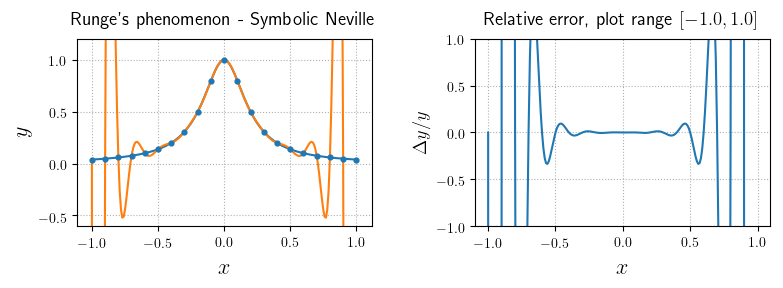

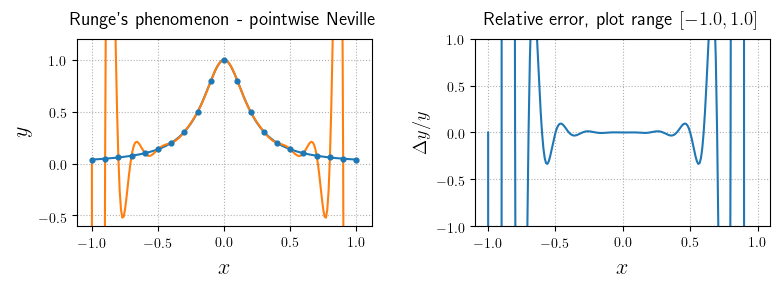

In [8]:
from backstage import x_list, y_list

display_whitespace(.5)
sym_neville_test \
    = interp_test(SymbolicNevilleInterpolation(x_list, y_list).function,
                  "Runge's phenomenon - Symbolic Neville", [-.6, 1.2], [-1., 1.])
neville_test \
    = interp_test(neville_interpolation(x_list, y_list),
                  "Runge's phenomenon - pointwise Neville", [-.6, 1.2], [-1., 1.])

由图可见，多项式插值在 $[-0.5,0.5]$ 范围内还是很优秀的，然而一出此区间即一塌糊涂；即：
$$ |x^n| \to\infty,\,\text{when}\ |x| \to\infty $$
将 Runge 现象展示得淋漓尽致。此外，对这一问题而言，符号计算（symbolic, 即 `SymbolicNevilleInterpolation`）和逐点迭代（pointwise, 即 `neville_interpolation`）的结果没有显著差异；后者虽说迭代次数更多，但不涉及符号计算，因此实际上更快（快很多...）。因此，后续的实现均采用逐点迭代的办法，不再采用符号计算。

> 当然，由于这里涉及的逐点迭代均是多项式的迭代，实际上可以不引入符号计算，而仅用列表存储多项式的系数，对系数迭代得到最终的插值多项式系数；这应当是最快的办法。（但由于本人懒惰，并未在本次作业中实现这一功能...）

相应地，生成 $[-1,1]$ 区间内间隔为 0.05 的代表数据点并导出，如下所示（仅列出前若干点）。同样，为简洁起见，`interp_test_output` 隐于 `backstage` 内，通过 `import` 调用。

In [9]:
from backstage import interp_test_output
# interp_test_output??
interp_test_output(neville_interpolation(x_list, y_list), 'P', 'neville')

,$x$,$f(x)$,$P(x)$,"$|\,P - f\,|$"
0,-1.00,0.038462,0.038462,5.596912e-13
1,-0.95,0.042440,-39.952449,3.999489e+01
2,-0.90,0.047059,0.047059,5.051515e-15
3,-0.85,0.052459,3.454958,3.402499e+00
4,-0.80,0.058824,0.058824,1.643824e-14
5,-0.75,0.066390,-0.447052,5.134420e-01
6,-0.70,0.075472,0.075472,2.456368e-15
7,-0.65,0.086486,0.202423,1.159361e-01
8,-0.60,0.100000,0.100000,9.436896e-16
9,-0.55,0.116788,0.080660,3.612833e-02


 ...... *more in* [`csv/neville.csv`](csv/neville.csv) 

### (b) $n = 20$ 的 Chebyshev 近似
这里我们考虑节点为：
$$
    x_k = \cos
        \frac{\pi\,(k + \tfrac{1}{2})}{n},\quad
    k = 0,1,\dots,n-1 = 19
$$
的 Chebyshev 近似；注意实际上只有 20 个节点，但由于这 20 个点均落在 $(-1, 1)$ 区间内部而非端点处，故认为其与前述的多项式插值大致可比。采用逐点迭代的办法，给出：

Source:
def chebyshev_approximation(input_function, order: int):
    """ Chebyshev approximation, using Clenshaw's algorithm. """
    n = order

    def chebyshev_nodes(n: int, k: int, m=1):
        return cos(pi * m * (k + 0.5) / n)

    node_values \
        = [ input_function(chebyshev_nodes(n, k)) for k in range(n) ]
    c = [2 * sum([ node_values[k] * chebyshev_nodes(n, k, m)
                   for k in range(n) ]) / n
         for m in range(n)]

    # Clenshaw's algorithm: b as auxilary function.
    b = list(range(n))
    # Last two entries of b
    b += [0, 0]

    # Clenshaw's iteration
    def child_function(x: float):
        for k in range(n - 1, 0, -1):
            b[k] = (c[k] + 2 * x * b[k + 1] - b[k + 2])
        return c[0] * 0.5 + x * b[1] - b[2]
    return child_function


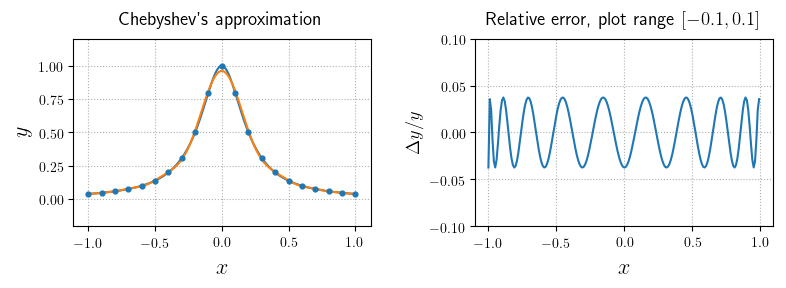

In [10]:
from toolkit.interpol import chebyshev_approximation
chebyshev_approximation??
display_whitespace(.5)
chebyshev_test \
    = interp_test(chebyshev_approximation(runge, 20),
                  "Chebyshev's approximation", [-.2, 1.2], [-.1, .1])

比较 (a), (b) 的插值结果，可见多项式插值在函数值变化剧烈的原点附近比较成功，但整体上看 Chebyshev 完胜；由于基函数：
$$
    T_n(x) = \cos (n\arccos x) \le 1
$$
导致误差被严格地控制在一定范围内，因此很好地避免了 Runge 现象。*但与此同时，由图可见，$T_n$ 的振荡行为也导致了误差的振荡形式。*导出数据：

In [11]:
interp_test_output(chebyshev_approximation(runge, 20), 'C', 'chebyshev')

,$x$,$f(x)$,$C(x)$,"$|\,C - f\,|$"
0,-1.00,0.038462,0.037016,0.001446
1,-0.95,0.042440,0.040849,0.001592
2,-0.90,0.047059,0.048685,0.001626
3,-0.85,0.052459,0.052261,0.000198
4,-0.80,0.058824,0.056713,0.002110
5,-0.75,0.066390,0.067169,0.000779
6,-0.70,0.075472,0.078252,0.002780
7,-0.65,0.086486,0.086534,0.000047
8,-0.60,0.100000,0.096413,0.003587
9,-0.55,0.116788,0.114126,0.002663


 ...... *more in* [`csv/chebyshev.csv`](csv/chebyshev.csv) 

### (c) 三次样条内插
采用前面给出的 21 个 *均匀* 节点，考察三次样条内插。我们知道，三次样条内插最终将化归为三对角阵的求解，因此我们先写个一般性的三对角阵求解程序：

In [12]:
from toolkit.linearsol import thomas_tridiagonal_solve
thomas_tridiagonal_solve??

Source:
def thomas_tridiagonal_solve(diag: list, upper: list, lower: list, rhs: list):
    """ Thomas algorithm for solving tridiagonal matrix;
        :param diag: diagonal elements as n-list;
        :param upper: upper diagonal elements as (n-1)-list, row-indexed
        :param lower: lower diagonal elements as n-list, row-indexed;
            Note: first entry should be zero for `lower`.
    """

    n = len(diag)
    if (len(upper) > n or len(lower) > n):
        raise ValueError('Tri-diagonal construction failed: '
                         'dimensions inconsistent!')
    if float(lower[0]) != 0.:
        print('First entry of lower diagonal elements nonzero!'
              'Information lost. ')

    # LU decomposition
    # Convention of notation: liuchuan's Numerical.pdf, ver 0.98
    alpha = [diag[0]]
    # Lower diagonal elements for L
    beta = [0.]
    for i in range(1, n):
        beta.append(lower[i] / alpha[i - 1])
        alpha.append(diag[i] - beta[i] * upper[i - 1])



在此基础上，实现三次样条插值，结果如下：

Source:
def cubic_spline_interpolation(x_list: list, y_list: list,
                               boundary_derivatives=None,
                               boundary_moments=(0, 0)):

    """ Cubic spline with various boundary conditions.
        :param boundary_derivatives: default to None;
            boundary_derivatives[0]: left boundary value;
            boundary_derivatives[1]: right boundary value;
                when specified they takes precedence over `boundary_moments`.
        :param boundary_moments: (0, 0) ~ natural boundary
    """

    length = len(x_list)
    if length != len(y_list):
        raise ValueError('Cubic spline interpolation failed:'
                         'Length of x_list != y_list')

    # Get stepsize
    h = []
    for i in range(length - 1):
        h_next = x_list[i + 1] - x_list[i]
        if h_next < 0:
            raise ValueError('Cubic spline stepsize error:'
                             'x_list is not monotonically increasing.')
        h.ap

,$x$,$f(x)$,$S(x)$,"$|\,S - f\,|$"
0,-1.00,0.038462,0.038462,0.000000e+00
1,-0.95,0.042440,0.042534,9.389813e-05
2,-0.90,0.047059,0.047059,6.938894e-18
3,-0.85,0.052459,0.052431,2.772903e-05
4,-0.80,0.058824,0.058824,1.387779e-17
5,-0.75,0.066390,0.066394,4.011889e-06
6,-0.70,0.075472,0.075472,2.775558e-17
7,-0.65,0.086486,0.086474,1.285531e-05
8,-0.60,0.100000,0.100000,0.000000e+00
9,-0.55,0.116788,0.116787,1.446703e-06


 ...... *more in* [`csv/spline.csv`](csv/spline.csv) 

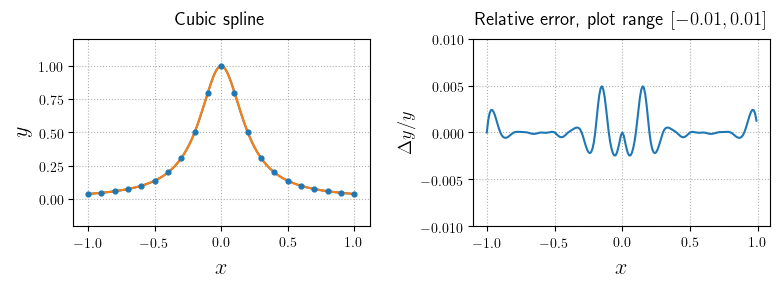

In [13]:
from toolkit.interpol import cubic_spline_interpolation
cubic_spline_interpolation??
interp_test_output(cubic_spline_interpolation(x_list, y_list), 'S', 'spline')
display_whitespace(.5)
cubic_spline_test \
    = interp_test(cubic_spline_interpolation(x_list, y_list),
                  "Cubic spline", [-.2, 1.2], [-.01, .01])

可见直观上三次样条内插的结果近乎完美，与原曲线基本不可区分；注意，上面相对误差（relative error）图意在反应误差沿 $x$ 的分布规律，故三种插值方案的误差图像具有不同的纵轴标度；为公平地比较不同方法的误差大小，将三条误差曲线综合如下：

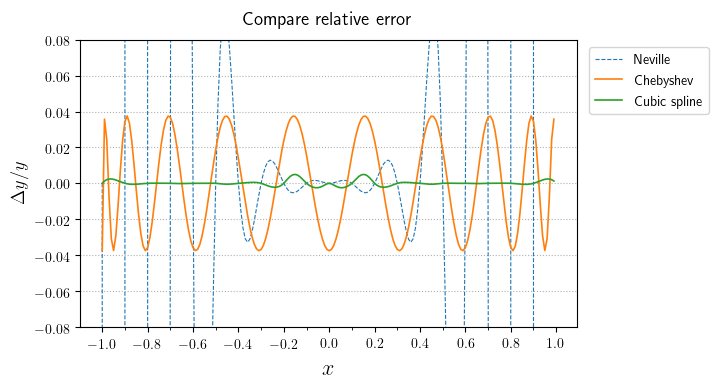

In [14]:
from backstage import compare_error
# compare_error??

display_whitespace(.5)
y_dict = { 'Neville': neville_test,
           'Chebyshev': chebyshev_test,
           'Cubic spline': cubic_spline_test }
compare_error(y_dict, "relative error", [-.08, .08])

可见三次样条插值确实是最佳选择，其在原点附近（函数值变化剧烈的区域）以及大 $x$ 区域的表现均相当优秀。三次样条插值的精髓在于使用 *低阶* 多项式实现 *局部* 最优化，这同时避免了 Runge 现象和别处插值点的 *长程* 影响（Chebyshev 近似的问题）。(其代价在于，我们无法得到一个干净的、整体的解析表达式，且不能进行外推...)

## 2. 样条函数在计算机绘图中的运用
考虑心形线：

In [15]:
from backstage import cardioid
cardioid??

Source:
def cardioid(phi: float):
    return 1. - num.cos(phi)


的绘制。事实上，写出此方程时，我们便自然地选取了一个原点 $r = 0$. 进一步，
### (a) 取插值节点
等分 $2\pi$, 这里取 $\phi_t = t\,\frac{\pi}{4},\,\big(x(\phi_t), y(\phi_t)\big)$ 为绘图节点。给出相应的坐标，列表如下：

In [16]:
from backstage import t_list, xt_list, yt_list
xy_table = pd.DataFrame([t_list, xt_list, yt_list])
xy_table.index = ['$t$', '$x_{(t)}$', '$y_{(t)}$']
display(xy_table)

,0,1,2,3,4,5,6,7,8
$t$,0.0,1.000000,2.000000e+00,3.000000,4.000000e+00,5.000000,6.000000e+00,7.000000,8.0
$x_{(t)}$,0.0,0.207107,6.123234e-17,-1.207107,-2.000000e+00,-1.207107,-1.836970e-16,0.207107,0.0
$y_{(t)}$,0.0,0.207107,1.000000e+00,1.207107,2.449294e-16,-1.207107,-1.000000e+00,-0.207107,-0.0


### (b) 构造样条函数
利用前面实现的 `cubic_spline_interpolation`, 构造样条函数如下：

In [17]:
sx, sy = list(map(
    lambda x: cubic_spline_interpolation(t_list, x),
    [xt_list, yt_list]
))

### (c) 作图比较

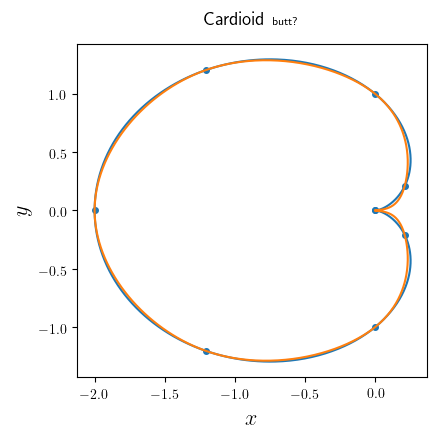

In [18]:
from backstage import cardioid_graph
# cardioid_graph??
display_whitespace(.5)
cardioid_graph('Cardioid \\footnotesize butt?', sx, sy)

仅仅取了 $8 + 1$ 个点，便与原曲线十分吻合；可以说是非常厉害了！
### (d) 这一方法的有效性
三次样条曲线可以平滑地连接所有点，首先在于其能平滑地逼近 $x(t)$ 和 $y(t)$ 函数（要求节点处导数吻合，从而整体达到一阶连续，即 $C^1$ 的水平）；又 $\phi(t)$ 为线性关系，因此插值导出的 $\tilde{r}(\phi)$ 也是一个至少 $C^1$ 连续的函数。

*此外，由于采用低阶多项式，不会引入额外的弯曲，故可谓“平”滑。*

另，$\tilde{r}(\phi)$ *函数（直角坐标图像）* 的平滑和其 *极坐标图像* 的平滑是等价的；这可以由下面这一炫酷的动画直观地体会到（来源于 [Wikipedia](https://en.wikipedia.org/wiki/File:Cartesian_to_polar.gif) ）。<br/>
有 18 秒，得慢慢看... <img class="inline_img" src="https://bryango.github.io/assets/coolemoji/weibo_dog8.png" width="24px" /> 

<img src="Cartesian_to_polar.gif" width="35%" />

## 3. $\newcommand{\zfunction}{\mathcal{Z}_{00}(1;q^2)}\zfunction$ 的一些研究
### (a) $\zfunction$ 求和阶数分析
首先笔者尝试从理论上给出 $\zfunction$ 的初步估计。

In [19]:
pdfGet('latex/sections/3.asymptotic.pdf').show()

由于 $\mathcal{Z}$ 函数的复杂性，理论分析的作用实际上非常有限；我们只能粗略地给出求和余项的上限 $\tilde{\epsilon}$, 至于结果的有效数字到底有多少，则首先得知道具体的数值结果，并加以比较。为了做到这一点，我们需要数值积分工具；这里采用外推积分方法（即 Romberg's method），并对其稍加改进，使得外推操作不仅能对有限步长进行优化，*还能解决边界点的奇异性*。具体如下：

In [20]:
from toolkit.integral import integrate_romberg
integrate_romberg??

Source:
def integrate_romberg(func, x_min: float, x_max: float,
                      interpol_order=8):
    """ Romberg's method for integration,
        :param interpol_order: Neville interpolation order.
    """

    # Get minimal stepsize
    h0 = (x_max - x_min) / 2**interpol_order
    if h0 < 0:
        raise ValueError("x_max is smaller than x_min")
    h_list = [(x_max - x_min) / 2**i for i in range(interpol_order + 1)]

    def boundary_mod(boundary_side, boundary_pt, h):
        if boundary_side == 'max':
            return boundary_pt - h
        elif boundary_side == 'min':
            return boundary_pt + h

    def singularity_detected(boundary_side, boundary_pt):
        try:
            func(boundary_pt)
        except (ArithmeticError, ValueError):
            return True
        else:
            return False

    x_max_singular, x_min_singular = map(
        lambda boundary_info: singularity_detected(*boundary_info),
        [ ['max', x_max], ['min', x_min] ]
    )



**如上可见，我们在减小步长的同时，也让积分边界逐渐逼近具有奇异性的端点；**最后采用 Neville 插值外推得到步长 $h \to 0$, 且同时边界趋于奇异端点的结果。以此计算 $\zfunction$ 和 $\tilde{\epsilon}$, 首先采用最粗糙的参数
$m = 2,\,m' = 1$, 并取 $k = 16$（从而此后 $k$ 求和的余项按快于 $1/2^k$ 的速率衰减）, 作图如下：
> 在程序当中，为保证变量之意义自明，记 $m =$ `n_max_alpha`, $m' =$ `n_max_beta`. <br/>
> 在文档中使用 $m,\,m'$ 则是为了少打些字...

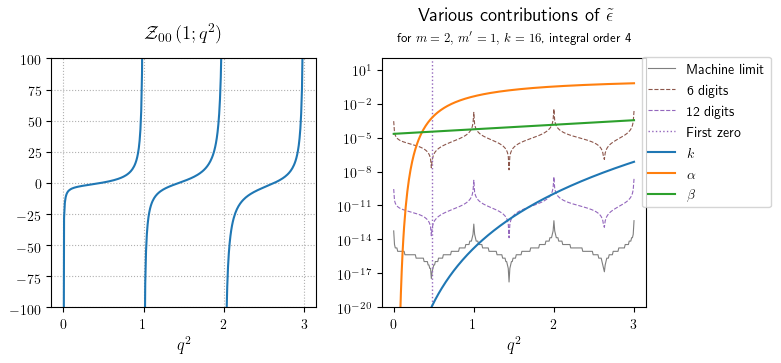

In [21]:
from backstage import zeta_eps_plot
# zeta_eps_plot??
display_whitespace(.5)
zeta_eps_plot(n_max_alpha=2, n_max_beta=1,
              k_max=16, int_order=4,
              y_range=[-100, 100])

*注意，这里我们暂不考虑外推积分的准确度，只要够用即可（给出基本正确的 $\zfunction$ 函数值），故其阶数仅取为 4（对应最小步长 $1 / 2^4$）。* 作为比较，这里我们还画出了当前函数值对应的误差*下限* （图中标记为 Machine limit），定义为：

In [22]:
from backstage import machine_limit_at
machine_limit_at??

Source:
def machine_limit_at(x):
    return abs(num.nextafter(x, 1) - x)


以及 6 位和 12 位有效数字所要求的精度；其中 Machine limit 大致是函数值乘以机器精度（对笔者使用的机器而言 $\sim 10^{-16}$）。误差曲线的波动正比于函数值的波动，由于采用了对数标度，$\log 0. \sim -\infty$, 在函数值为零时体现奇异性；如图所示，函数的第一个零点（First zero）以一纵线标出。

考察各成分对 $\tilde{\epsilon}$ 的贡献，相应地增大 $m, m'$, 使其落在 6 位有效数字（6 digits）的参考曲线之下，有如下结果：

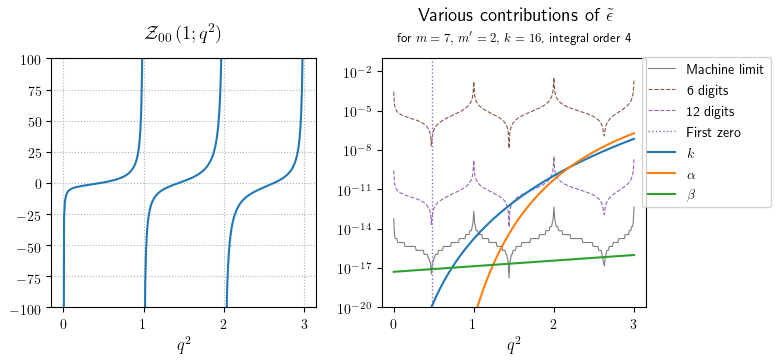

In [23]:
display_whitespace(.5)
zeta_eps_plot(n_max_alpha=7, n_max_beta=2,
              k_max=16, int_order=4,
              y_range=[-100, 100], error_range=[1e-20, 1e-1])

可见 $\beta$ 项收敛得非常快，只需保留到 $m' = 2$, 余项的贡献便减小了十余个数量级；而 $\alpha$ 项则比较缓慢，直到 $m = 7$ 才大致满足 6 位有效数字的要求。

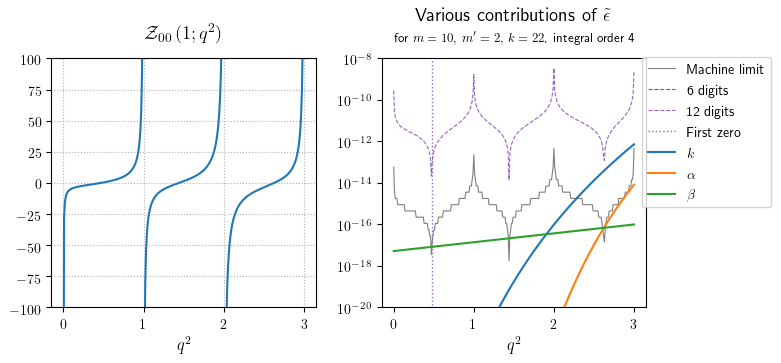

In [24]:
display_whitespace(.5)
zeta_eps_plot(n_max_alpha=10, n_max_beta=2,
              k_max=22, int_order=4,
              y_range=[-100, 100], error_range=[1e-20, 1e-8])

相应地，对应 12 位有效数字，大致有 $m = 10$. 

综上所述，为达到 6 位有效数字，$\alpha$ 项：$\sum_{\mathbf{n}} \frac{e^{q^2 - \mathbf{n}^2}}{\mathbf{n}^2 - q^2}$ 应当保留到 $n_i \le m = n_{\max,\,\alpha} = 7$, <br/>
&nbsp;&nbsp; 而 $\beta$ 项：$\sum_{\mathbf{n}\ne 0} \exp\big(-\frac{\pi^2}{t}\,\mathbf{n}^2\big)$ 只要保留到 $n_i \le m' = n_{\max,\,\beta} = 2$. <br/>
相应地，为达 12 位有效数字，只需增加 $\alpha$ 项至：$m = n_{\max,\,\alpha} = 10$, <br/>
&nbsp;&nbsp; 而 $\beta$ 项求和已经足够精确，只需维持：$m' = n_{\max,\,\beta} = 2$. <br/>
这里，$n_i = n_x, n_y, n_z$ 表示 $\mathbf{n}$ 的三个分量。

**再次强调，这里的 $\tilde{\epsilon}$ 是根据最坏情况给出的估计，因此上面给出的 $m, m'$ 完全有可能过高，但可以确保在 $q \in (0,3)$ 整个区间上、函数零点以外的区域内达到精度要求。**（函数值近零的区域内，相对误差总是趋于无穷，此时有效数字与相对误差不再等同。）

事实上，**若对函数求值的性能有所要求，可考虑对不同的宗量 *自适应* 地调整相应的求和阶数；对于本问题而言，误差上限 $\tilde{\epsilon}$ 随 $q^2$ 单调增，且在函数值趋于无穷的点附近很容易达到精度要求，因此可以相应地减少求和阶数。** 例如，对 $q^2 \in (0,0.3)$（取 0.3 是为了避开第一个函数零点），$m = 3,\,m' = 1$ 已经足够满足 12 位精度要求：

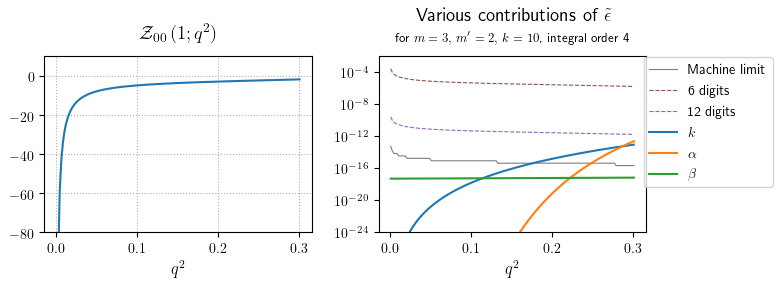

In [25]:
from backstage import zeta_eps_plot_mini
display_whitespace(.5)
zeta_eps_plot_mini(n_max_alpha=3, n_max_beta=2,
                   k_max=10, int_order=4,
                   y_range=[-80, 10], error_range=[1e-24, 1e-2])

更特别地，对 $q^2 = 0.001$, 有：

In [26]:
from zeta_study import zeta, eps
params_thousandth = [.001, 1, 2, 4, 4]
zeta_thousandth = pd.DataFrame.from_dict({
    '$\mathcal{Z}_{00}\,(1;q^2)$': zeta(*params_thousandth),
    'Error': eps(*params_thousandth),
    'Relative': abs(eps(*params_thousandth) / zeta(*params_thousandth))},
    orient='index').T
display(HTML(zeta_thousandth.to_html(index=False)))

"$\mathcal{Z}_{00}\,(1;q^2)$",Error,Relative
-284.624633,5.445544e-15,1.913237e-17


即 $m = 1,\,m' = 2$ 对应的相对误差已经达到机器精度水平，完全不必计算更多求和。进一步，对于更小的 $q^2$, 第一项求和有渐进行为：
$$ \zfunction \sim -\pi - \frac{1}{\sqrt{4\pi}} \frac{1}{q^2} < 0$$
而其余项均趋于常量，并不发散，相应地 $\tilde{\epsilon} > 0$ 反而减小，因此 $m = 1,\,m' = 2$ 均足以满足精度要求。

综上可见，最经济实惠的办法是根据输入 $q^2$ 值自适应地判定所需求和阶数；但这在程序实现上比较麻烦，这里为简洁起见，取适用于整个 $(0,3)$ 区间的保守估计作为默认截断参数，以避免递归判断（主要是懒...）。

### (b) 含 $\zfunction$ 的方程求根
相比上一问题而言，这一部分是直截了当的；我们采用简单而强大的割线法求根：

In [27]:
from toolkit.rootfinder import find_root_secant
find_root_secant??

Source:
def find_root_secant(func, x1: float, x2: float, accuracy=10**(-8)):
    """ Find root using secant method;
        :param func: equation to solve, as in f(x) = 0;
        :param x1, x2: initial pts of iteration;
        :param accuracy: goal of accuracy.
    """

    x_len = x2 - x1
    try:
        f1 = func(x1)
        f2 = func(x2)
        while abs(x_len) >= accuracy:
            x_len = (x2 - x1) * f2 / (f2 - f1)
            x1, f1 = x2, f2
            x2 -= x_len
            f2 = func(x2)
    except (ArithmeticError, ValueError):
        raise ValueError("Secant method failed to find root.")
    return x2


这里的 `accuracy` 即为目标精度，作为迭代的判停标准；对于本问题而言，由函数图像可见，根大致在 $(0.5, 1)$ 之间：

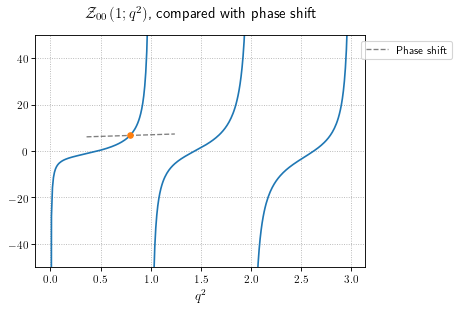

In [28]:
from backstage import zeta_root_plot
rootfinder_params = [7, 2, 16, 4]
display_whitespace(.5)
zeta_root_plot(*rootfinder_params, y_range=[-50, 50])

考虑到机器精度 $\sim 10^{-16}$, 这里即取 `accuracy=10**(-16)`. 与前一问题不同，此时我们不应忽视计算 $\zfunction$ 时的积分误差；事实上，可递增 `int_order = 1, 2, 3, ...`, 直到求得的根不再变化为止。

In [29]:
from zeta_study import phase_shift
from itertools import count

root = .5
print('Root:')
for i in count(start=1):
    root_new = find_root_secant(
        lambda x: zeta(x, *rootfinder_params[:-1], int_order=i) - phase_shift(x), .5, .99,
        accuracy=10**(-16))
    print(f"    `int_order` = {i}, %.56f" % root_new)
    if root_new != root:
        root = root_new
    else:
        break

Root:
    `int_order` = 1, 0.79451690922973872144297047270811162889003753662109375000
    `int_order` = 2, 0.79451545406851609154585958094685338437557220458984375000
    `int_order` = 3, 0.79451566210742918805465251352870836853981018066406250000
    `int_order` = 4, 0.79451565788884148666681994654936715960502624511718750000
    `int_order` = 5, 0.79451565791514355829860960511723533272743225097656250000
    `int_order` = 6, 0.79451565791509604075315564841730520129203796386718750000
    `int_order` = 7, 0.79451565791509604075315564841730520129203796386718750000


可见 `int_order = 7` 即外推积分至 7 阶即足够；此时有：

In [30]:
print("Root with 6 significant digits: %.6f" % root)

Root with 6 significant digits: 0.794516


In [31]:
goodbye('ex2')

<IPython.core.display.Javascript object>

[NbConvertApp] Converting notebook ex2.ipynb to script
